In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('117 01Students.csv')
df.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [5]:
df.isnull() 

,Hours,Marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
df.fillna(df.mean(), inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(df) 

StandardScaler()

In [8]:
import statistics as st

In [9]:
st.mode(df["Marks"]) 

45

In [10]:
df["Marks"].mean()

61.4

In [11]:
df["Marks"].median()

60.0

In [12]:
df["Marks"].std()

17.734828387414254

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

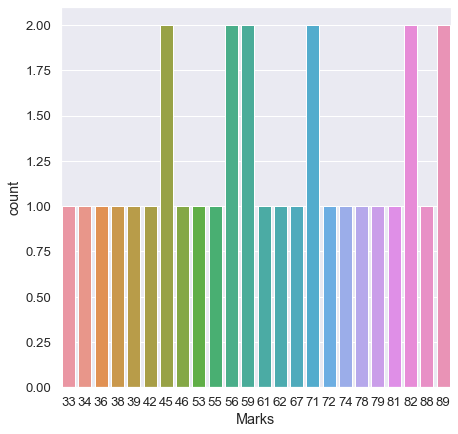

In [14]:
sns.countplot(x='Marks', data=df)

The highest mark is 89 and the lowest marks is 33.
all students has a unique mark, but others repeated at some mark

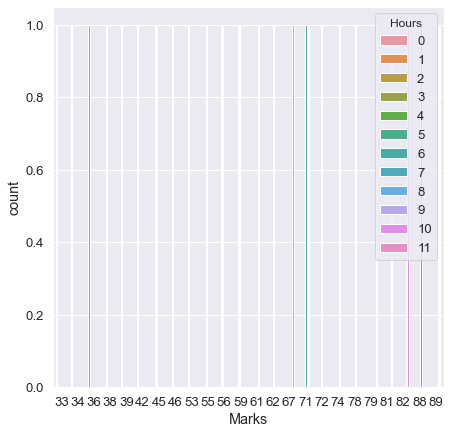

In [15]:
sns.countplot(x='Marks', data=df,hue="Hours")

if student studied hard he will got more mark.

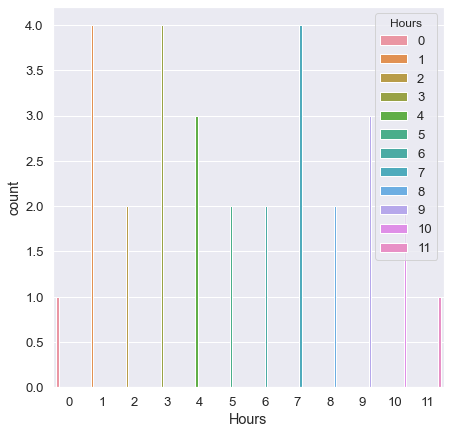

In [16]:
sns.countplot(x='Hours', data=df,hue="Hours")

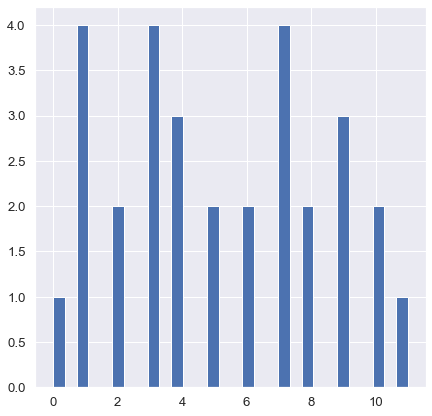

In [17]:
df["Hours"].hist(bins=30) 

from a 2 plot above the hour of student's studying varient from someone to others

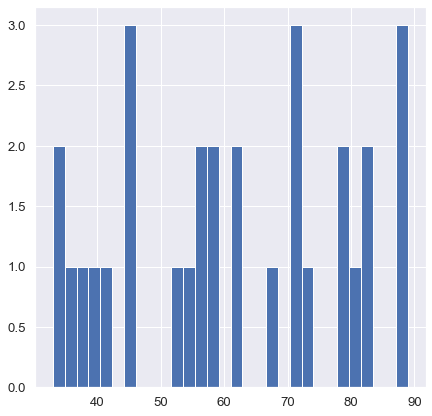

In [18]:
df["Marks"].hist(bins=30) 

the marks of students are varient depend on studying abibilities 

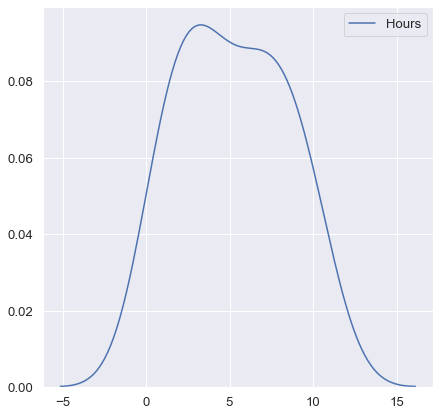

In [19]:
sns.kdeplot(df["Hours"] )

The largest value for hours from above is 3

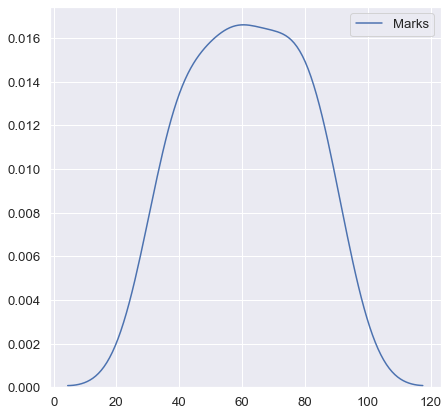

In [20]:
sns.kdeplot(df["Marks"])

median value is 60

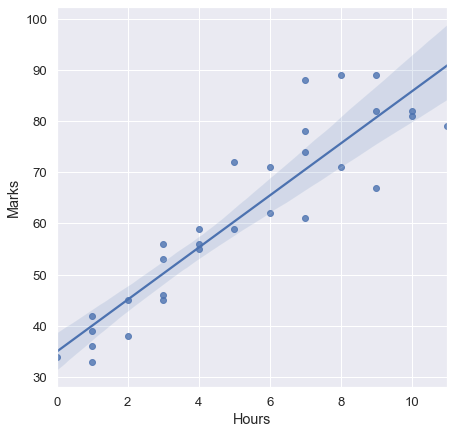

In [21]:
sns.regplot(y=df["Marks"],x=df["Hours"])

The relationship between hours and marks is positive relation 

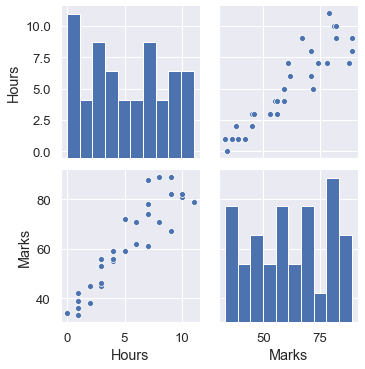

In [22]:
sns.pairplot(df)

The relationship between hours and marks is positive relation 

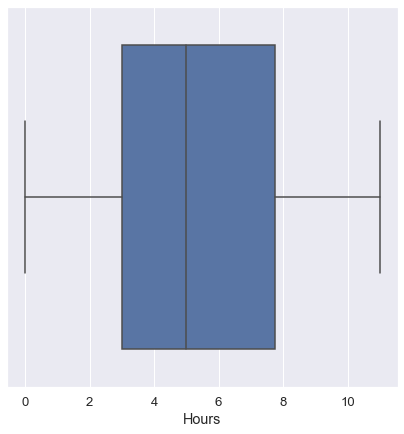

In [23]:
sns.boxplot(df["Hours"])

from above I note that most studying hours for student in range between 3 and 7 with a decimal value 
median value = 5 approximattely.

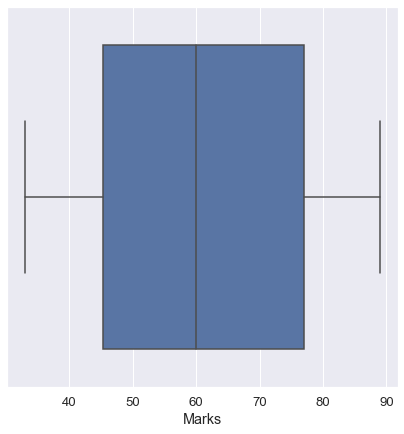

In [24]:
sns.boxplot(df["Marks"])

from above I note that most marks for student in range between 45 and 77 with decimal value 
median value = 60.

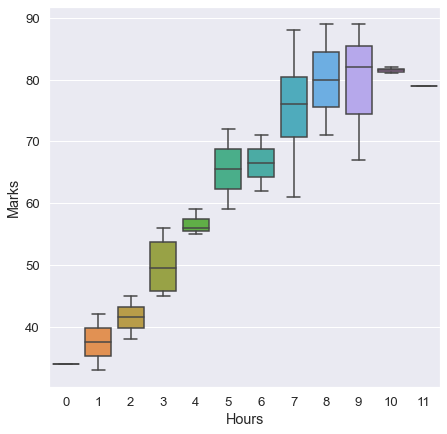

In [25]:
sns.boxplot(x="Hours",y="Marks",data=df)

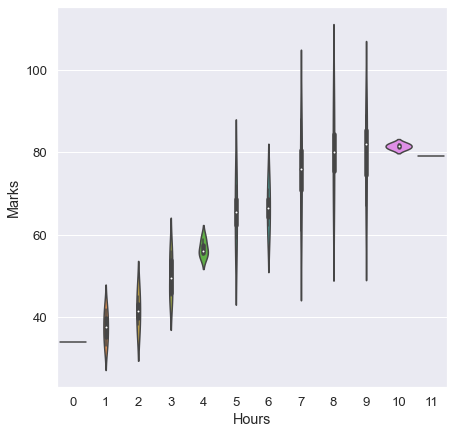

In [26]:
sns.violinplot(x="Hours",y="Marks",data=df)

student who studied either 0 or 11 hours is one.
at 10 hours a convergent values others have a varient values that is Spaced.
highest mark is 89 on high edge of violinplot in 8 & 9 hours.

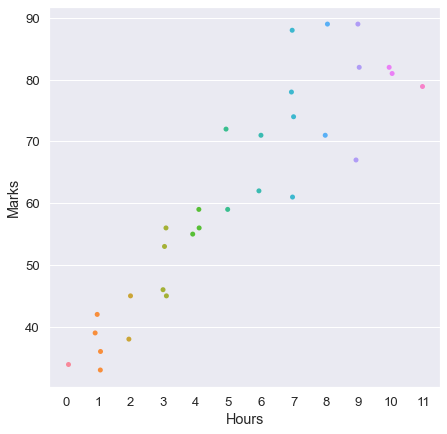

In [27]:
sns.stripplot(x="Hours",y="Marks",data=df)

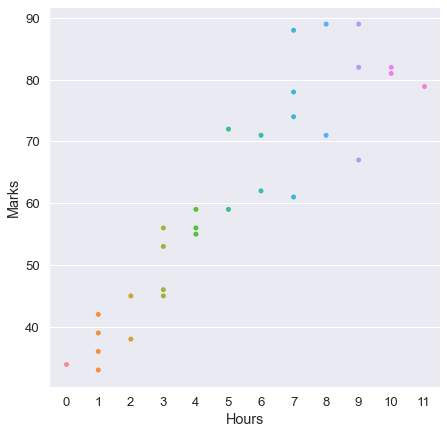

In [28]:
sns.swarmplot(x="Hours",y="Marks",data=df)

I note the 2 plots above explain that scores vary due to students' academic abilities.
The relationship between the number of study hours and the marks is direct

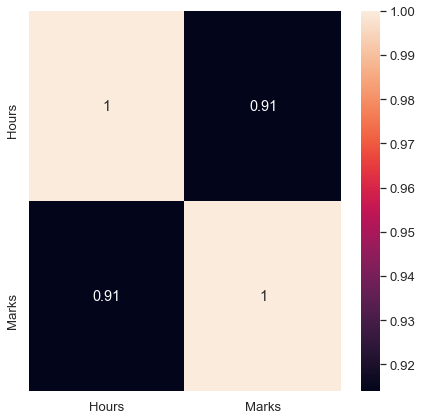

In [29]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Hours feature heatmap')

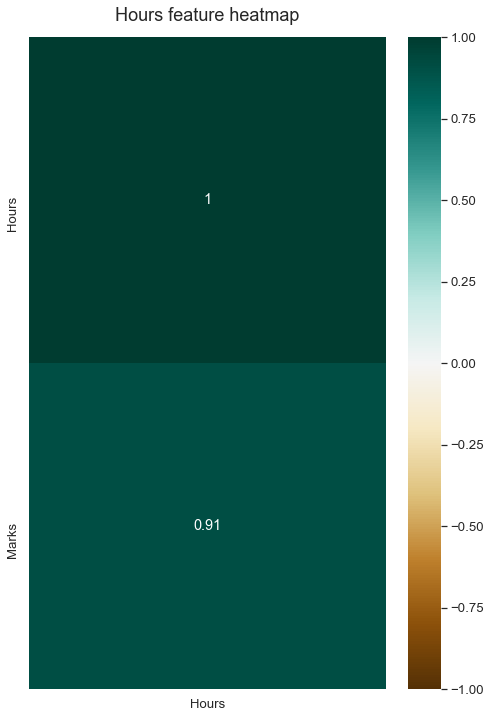

In [30]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Hours']].sort_values(by='Hours', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Hours feature heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Marks feature heatmap')

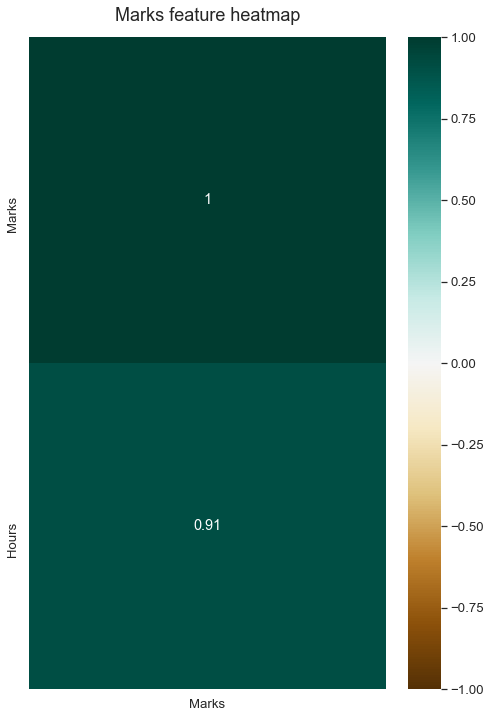

In [31]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Marks']].sort_values(by='Marks', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Marks feature heatmap', fontdict={'fontsize':18}, pad=16)

from above 3 plots the coeffecient (marks and hours) = 0.91 =>correlation is very high.

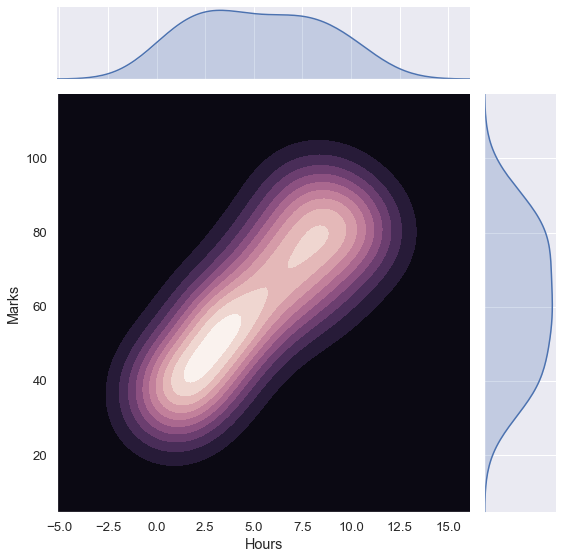

In [32]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.jointplot(x='Hours', y='Marks', data=df, kind='kde', cmap=cmap, height=8)

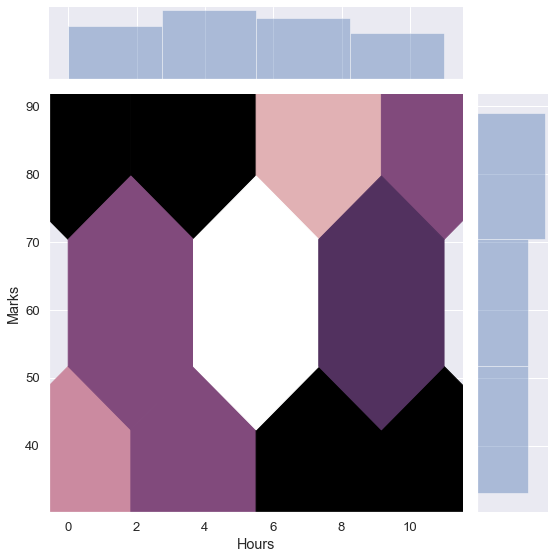

In [33]:
sns.jointplot(x='Hours', y='Marks', data=df, kind='hex', cmap=cmap, height=8)

From a 2 plot above I note if color is lighter(such as white color)=>more high correlation 

In [34]:
x = df['Hours'].values.reshape(-1, 1)
y = df['Marks']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [36]:
x_train.shape

(21, 1)

In [37]:
x_test.shape

(9, 1)

In [38]:
y_train.shape

(21,)

In [39]:
y_test.shape

(9,)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)
y_pred

array([71.55191257, 51.60655738, 46.62021858, 41.63387978, 41.63387978,
       71.55191257, 56.59289617, 86.51092896, 56.59289617])

In [43]:
y_test

20    61
7     45
5     45
2     33
3     39
21    74
13    56
27    81
12    55
Name: Marks, dtype: int64

In [44]:
model.score(x_train, y_train)

0.8038219508886962

In [45]:
model.score(x_test, y_test)

0.861518365947443

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.561255697988034

In [48]:
model.predict([[0]])

array([36.64754098])

In [49]:
model.predict([[11]])

array([91.49726776])

In [50]:
model.coef_ # weight for x

array([4.9863388])

In [51]:
model.intercept_ # #b0

36.64754098360657

h(x) = 34.87037882245551 + 5.01757188 * x

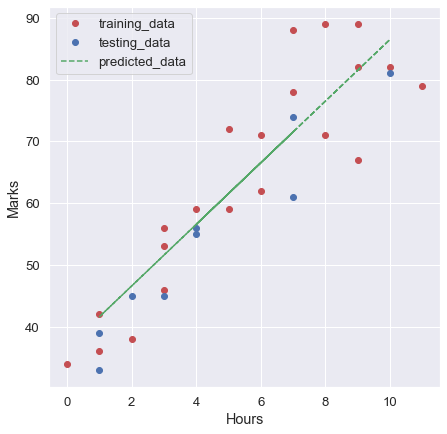

In [52]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_pred, 'g--', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()